[1.1208598  3.74042422] 0.11602540378443871


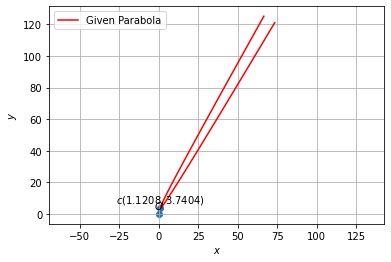

In [1]:
#Program to plot  the tangent of a parabola
#Code by GVV Sharma
#Released under GNU GPL
#August 10, 2020

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math


#local imports
from line.funcs import *
from triangle.funcs import *
from conics.funcs import *


#setting up plot
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
len = 100
y = np.linspace(-4,4,len)

#parab parameters
V = np.array(([3,-1*math.sqrt(3)],[-1*math.sqrt(3),1]))
u = np.array(([3,-2]))
f = 5
#p = np.array(([1,0]))
#foc = np.abs(p@u)/2

O = np.array(([0,0]))
#Generating the Standard parabola

#Eigenvalues and eigenvectors
D_vec,P = LA.eig(V)
D = np.diag(D_vec)
P[:,[0, 1]] =P[:,[1, 0]]
p = P[:,0]
eta = 2*u@p
#foc = np.abs(eta/D_vec[1])
foc = -eta/D_vec[0]
#print(p,foc,D_vec[1])
x = parab_gen(y,foc)
#Affine Parameters
#c1 = np.array(([-(u@V@u-2*u@u+f)/(2*u@p),0]))
#c = -P@u+c1
#print(c1)
#p = -p
cA = np.vstack((u+eta*0.5*p,V))
cb = np.vstack((-f,(eta*0.5*p-u).reshape(-1,1)))
c = LA.lstsq(cA,cb,rcond=None)[0]
c = c.flatten()
print(c,foc)
#print(cA,cb)
#print(p,c)

c1 = np.array(([(u@V@u-2*D_vec[1]*u@u+D_vec[1]**2*f)/(eta*D_vec[1]**2),0]))
xStandardparab = np.vstack((x,y))
#xActualparab = P@(xStandardparab - c1[:,np.newaxis])-u[:,np.newaxis]/D_vec[1]
xActualparab = P@xStandardparab + c[:,np.newaxis]
#xActualparab = P@xStandardparab 

##Tangent Analysis
#m_0 = 2/3
#m = np.array(([1,m_0]))
#n = omat@m
#kappa = p@u/(p@n)
#
#qA = np.vstack((u+kappa*n,V))
#qb = np.vstack((-f,(kappa*n-u).reshape(-1,1)))
#q = LA.lstsq(qA,qb,rcond=None)[0]
#q = q.flatten()
#O = np.array([0,0])
#print(c,q)
#
##Generating the tangent
#k1 = 2
#k2 = -2
#x_AB = line_dir_pt(m,q,k1,k2)
#
#Labeling the coordinates
parab_coords = np.vstack((O,c)).T
plt.scatter(parab_coords[0,:], parab_coords[1,:])
vert_labels = ['$O$','$c (1.1208, 3.7404)$']
for i, txt in enumerate(vert_labels):
    plt.annotate(txt, # this is the text
                 (parab_coords[0,i], parab_coords[1,i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#Plotting all lines
#plt.plot(x_AB[0,:],x_AB[1,:],label='Tangent')

#Plotting the actual parabola
#plt.plot(xStandardparab[0,:],xStandardparab[1,:],label='Parabola',color='r')
plt.plot(xActualparab[0,:],xActualparab[1,:],label='Given Parabola',color='r')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')

plt.show()
